In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
sns.set(font_scale=1.25, style='whitegrid')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

df_plot=pd.read_csv("blackbox_results.csv")

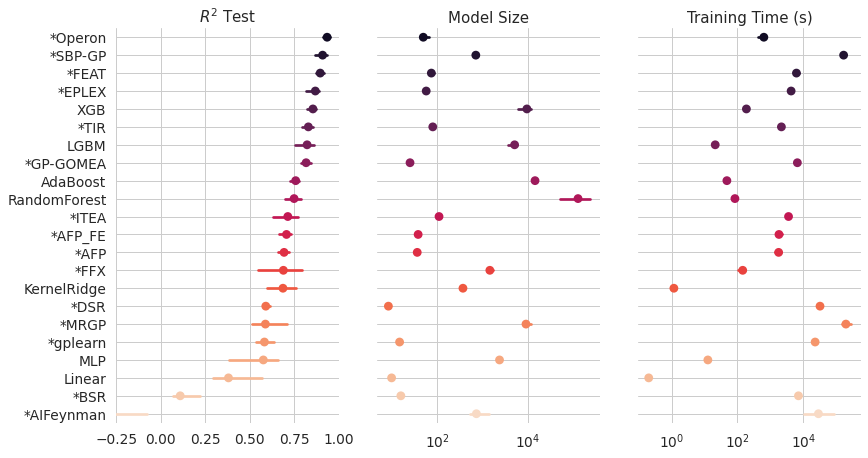

In [2]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        'model_size',
        'training time (s)',
]
order = df_plot.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index
g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 

g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )

# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/main_results.pdf", bbox_inches='tight')

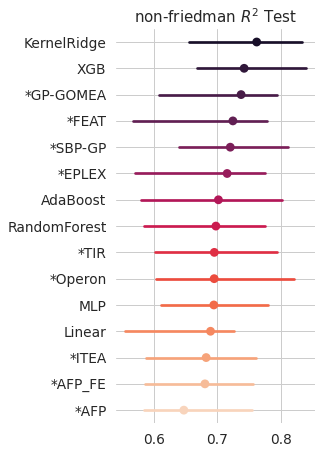

In [3]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plot[~df_plot.dataset.str.contains("_fri_")]#.sort_values(by='r2_test',ascending=False).head(10)

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','non-friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/nonfri_results.pdf", bbox_inches='tight')

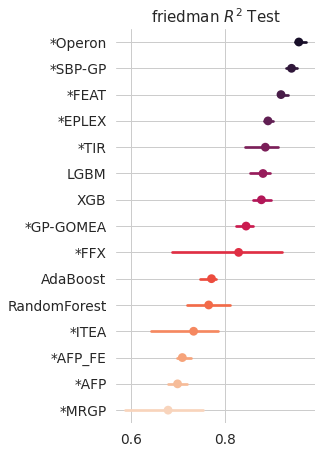

In [4]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plot[df_plot.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/fri_results.pdf", bbox_inches='tight')

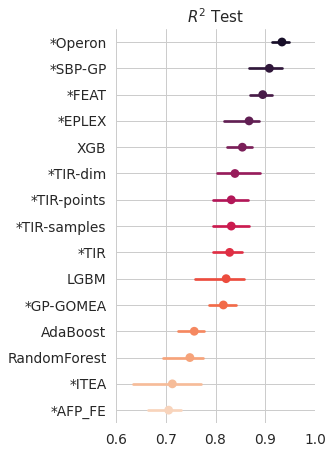

In [5]:
# Make the PairGrid
sns.set_style("whitegrid")

df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'rmse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty
#dfg = df_p[df_p.algorithm == 'TIRMOO2'].groupby('dataset')[x_vars[0]].median()
#df_p = df_p[df_p.dataset.isin(dfg.index)]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([.6,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_results.pdf", bbox_inches='tight')


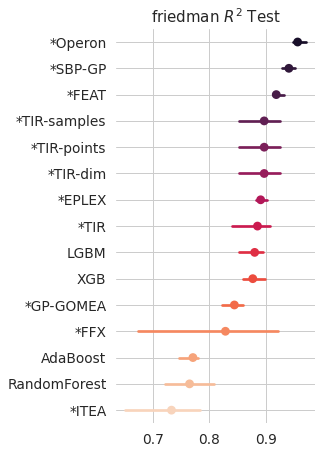

In [6]:
# Make the PairGrid
sns.set_style("whitegrid")

df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_fri_results.pdf", bbox_inches='tight')

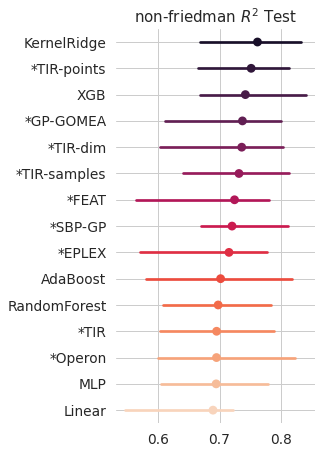

In [7]:
# Make the PairGrid
sns.set_style("whitegrid")

smallests = ["192_vineyard", "228_elusage", "485_analcatdata_vehicle", "1096_FacultySalaries", 
             "523_analcatdata_neavote", "663_rabe_266", "687_sleuth_ex1605", "659_sleuth_ex1714",
             "678_visualizing_environmental", "611_fri_c3_100_5", "594_fri_c2_100_5", "624_fri_c0_100_5",
             "656_fri_c1_100_5", "210_cloud", "706_sleuth_case1202", "1089_USCrime", "712_chscase_geyser1",
             "542_pollution", "527_analcatdata_election2000"]


df_plotPenalty = pd.read_csv("blackboxPenalty.csv")

# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      size=10,
      orient="h",
      jitter=False,
      order=order,
      palette="rocket",
      linewidth=1,
      markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','non-friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig("figs/penalty_nonfri_results.pdf", bbox_inches='tight')

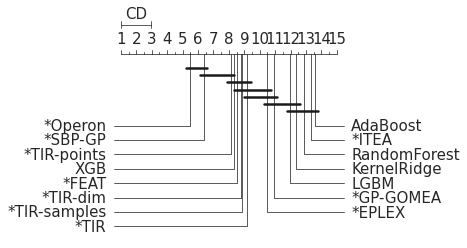

In [8]:
import Orange

# critical difference for Nemenyi with alpha=0.05
def cd_plot(df, pname):
    df_pivot = pd.pivot_table(df, index='algorithm', columns=['dataset'], values='r2_test')
    n = len(df_pivot.columns)
    ranks = df_pivot.rank(ascending=False).mean(axis=1).sort_values(ascending=True)    
    names = ranks.index.values[:15]
    avranks = ranks.values[:15]
    
    cd = Orange.evaluation.compute_CD(avranks, n)
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
    plt.savefig(pname, bbox_inches='tight')
        
cd_plot(df_plotPenalty, "figs/cd_results.pdf")

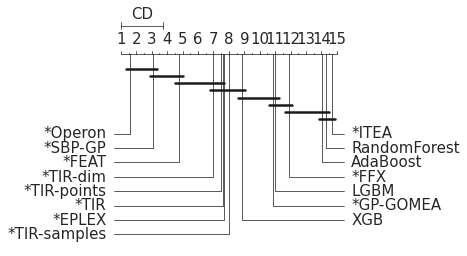

In [9]:
cd_plot(df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")], "figs/cd_fri_results.pdf")

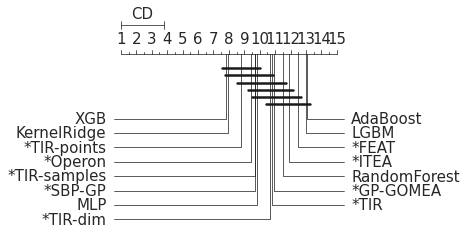

In [10]:
cd_plot(df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")],"figs/cd_nonfri_results.pdf")
